In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [2]:
masterfile = './Data/Master.csv'
master_df = pd.read_csv(masterfile)
master_df.head()
small_df = master_df[['playerID','birthMonth']]
small_df.head()

,playerID,birthMonth
0,aardsda01,12.0
1,aaronha01,2.0
2,aaronto01,8.0
3,aasedo01,9.0
4,abadan01,8.0


In [3]:
awardfile = './Data/AwardsPlayers.csv'
awards_df = pd.read_csv(awardfile)
awards_df.head()

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


In [4]:
print(master_df.shape)
print(awards_df.shape)

(18846, 24)
(6078, 6)


In [5]:
awards_df = awards_df.groupby('playerID').count().sort_values('awardID', ascending = False)

In [6]:
combined_df = pd.merge(small_df,awards_df,on = 'playerID',how = 'right')
combined_df = combined_df.sort_values('awardID',ascending = False)
combined_df.head()

,playerID,birthMonth,awardID,yearID,lgID,tie,notes
108,bondsba01,7.0,47,47,47,0,34
1279,willite01,8.0,39,39,39,0,28
306,dimagjo01,11.0,36,36,36,0,30
848,musiast01,11.0,34,34,34,0,24
1032,ruthba01,2.0,33,33,33,0,32


In [7]:
month_df = combined_df.groupby('birthMonth').sum()
month_df = month_df.reset_index()
month_df.head()

,birthMonth,awardID,yearID,lgID,tie,notes
0,1.0,335,335,335,3,221
1,2.0,434,434,434,3,365
2,3.0,472,472,472,5,360
3,4.0,654,654,654,2,514
4,5.0,587,587,587,3,455


In [8]:
battingfile = './Data/Batting.csv'
batting_df = pd.read_csv(battingfile)
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


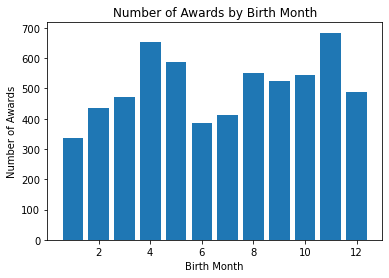

In [9]:
plt.bar(month_df['birthMonth'],month_df['awardID'])
plt.ylabel('Number of Awards')
plt.xlabel('Birth Month')
plt.title('Number of Awards by Birth Month')
plt.show()

The graph shows that the number of awards by the birth month.that shows the range of the highest vs the lowest.it indicates that April and November has the highest number of awards in the range of upper 600 in awards.Compare to the lowest range which is January and June with mid 300 in awards.

In [10]:
small_batting_df = batting_df[['playerID','R','H','RBI','HR','AB']]
small_batting_df = small_batting_df.groupby('playerID').sum()
batting_month_df = pd.merge(small_batting_df,small_df,on = 'playerID',how = 'left')
batting_month_df.head()

,playerID,R,H,RBI,HR,AB,birthMonth
0,aardsda01,0.0,0.0,0.0,0.0,4.0,12.0
1,aaronha01,2174.0,3771.0,2297.0,755.0,12364.0,2.0
2,aaronto01,102.0,216.0,94.0,13.0,944.0,8.0
3,aasedo01,0.0,0.0,0.0,0.0,5.0,9.0
4,abadan01,1.0,2.0,0.0,0.0,21.0,8.0


In [11]:
batting_month_df = batting_month_df.groupby('birthMonth').sum()
batting_month_df = batting_month_df.reset_index()

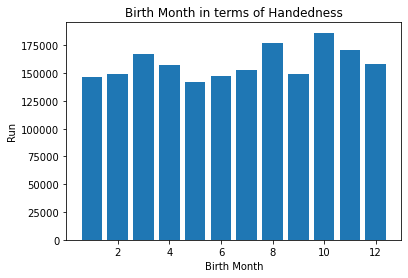

In [12]:
plt.bar(month_df['birthMonth'],batting_month_df['R'])
plt.ylabel('Run')
plt.xlabel('Birth Month')
plt.title('Birth Month in terms of Handedness')
plt.show()

This graph shows the runs in the Batting month. According to the chart it indicates that August through November Has the most runs. 
The run is scored when the player advances in the first, second or third base. The average of how many players that crosses the home plate.

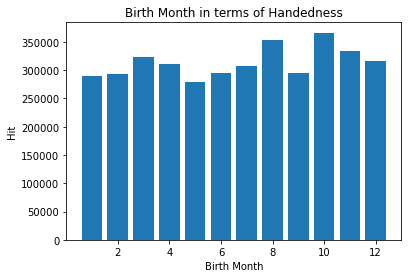

In [25]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['H'])
plt.ylabel('Hit')
plt.xlabel('Birth Month')
plt.title('Birth Month in terms of Handedness')
plt.show()

In the bar graph it gives us a description of how many hits the player have hit. During the month of August and November it had the most hits compare 
to the other months. During the months of August- November it has the highest peaks in the season.

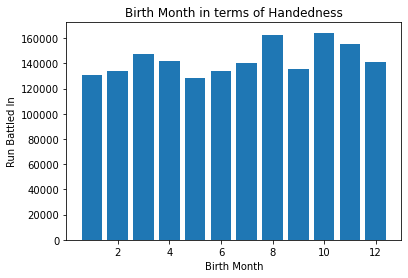

In [26]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['RBI'])
plt.ylabel('Run Battled In')
plt.xlabel('Birth Month')
plt.title('Birth Month in terms of Handedness')
plt.show()

Based on the chart it shows a steady graph from January through December. Run battled in is a statistic in baseball when
a batter is making the play that allows a run to be scored.This gives us a statistically picture of Run battled in through these months according to the birth month.


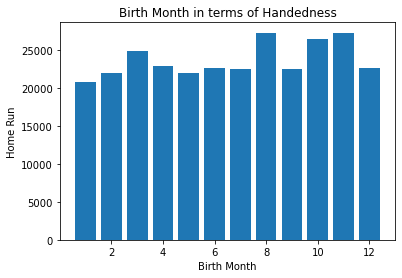

In [28]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['HR'])
plt.ylabel('Home Run')
plt.xlabel('Birth Month')
plt.title('Birth Month in terms of Handedness')
plt.show()

According to this graph it shows that from August through November it has the most Home Runs in the season, And from January through july it had a steady 
rates of Home runs.

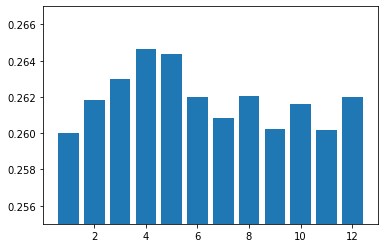

In [16]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['H']/batting_month_df['AB'])
plt.ylim([0.255,0.267])
plt.show()

This graph shows us that January had the lowest peak in the birth month and April and May had the highest peak in the hit and offical at-bat.
Official at bat is when the batter reaches for the base. And according to the birth month April had the highest.

In [17]:
combined_df = pd.merge(small_df,awards_df,on = 'playerID',how = 'right')
month_count = combined_df['birthMonth'].value_counts().to_frame()
month_count = month_count.reset_index()
combined_df = combined_df.groupby('playerID').sum()
combined_df = combined_df.reset_index()

In [18]:
month_count

,index,birthMonth
0,4.0,128
1,10.0,126
2,8.0,126
3,11.0,125
4,5.0,114
5,9.0,112
6,3.0,109
7,7.0,106
8,12.0,100
9,2.0,98


In [19]:
results_df = pd.merge(combined_df,month_count, right_on = 'index',left_on = 'birthMonth',how = 'left')
results_df = results_df.rename(columns = {'birthMonth_x': 'birthMonth','birthMonth_y':'MonthCount'})
results_df.head()

,playerID,birthMonth,awardID,yearID,lgID,tie,notes,index,MonthCount
0,aaronha01,2.0,16,16,16,0,12,2.0,98
1,abbotji01,9.0,2,2,2,0,1,9.0,112
2,abernte02,3.0,2,2,2,0,0,3.0,109
3,abreubo01,3.0,2,2,2,0,2,3.0,109
4,abreujo02,1.0,2,2,2,0,1,1.0,91


In [20]:
results_df['Average Award'] = results_df['awardID'] / results_df['MonthCount']
results_df

,playerID,birthMonth,awardID,yearID,lgID,tie,notes,index,MonthCount,Average Award
0,aaronha01,2.0,16,16,16,0,12,2.0,98,0.163265
1,abbotji01,9.0,2,2,2,0,1,9.0,112,0.017857
2,abernte02,3.0,2,2,2,0,0,3.0,109,0.018349
3,abreubo01,3.0,2,2,2,0,2,3.0,109,0.018349
4,abreujo02,1.0,2,2,2,0,1,1.0,91,0.021978
...,...,...,...,...,...,...,...,...,...,...
1318,zambrca01,6.0,3,3,3,0,3,6.0,88,0.034091
1319,zimmehe01,2.0,5,5,5,0,5,2.0,98,0.051020
1320,zimmery01,9.0,4,4,4,0,3,9.0,112,0.035714
1321,ziskri01,2.0,2,2,2,0,2,2.0,98,0.020408


In [21]:
birthmonthresults_df = results_df.groupby('birthMonth').sum()
birthmonthresults_df = birthmonthresults_df.reset_index()

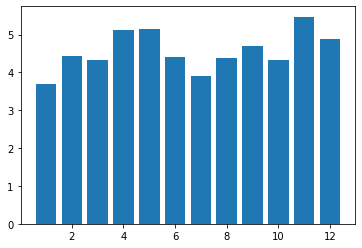

In [22]:
plt.bar(birthmonthresults_df['birthMonth'],birthmonthresults_df['Average Award'])
plt.show()

This graph shows multiple ranges in the average award based on the birth month. April and May both in the same range. November indicates the highest in Average award.January shows as the lowest in average awards.

In [23]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]

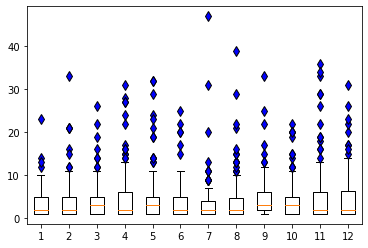

In [24]:
awards = [[] for i in months]

for month in months:

    temp_df = results_df.loc[results_df['birthMonth'] == month,:]
    
    for i in temp_df['awardID']:
        awards[months.index(month)].append(i)
        
        
        

flierprops = {'marker': 'd','markerfacecolor': 'blue','markersize':7}



plt.boxplot(awards,labels = months,flierprops = flierprops)

plt.show()

The boxplot gives us a picture of the description of the award in the birth months. It ranges in different months. To summerize the bar graph have slighlty similair correlation based on the birth months. the month of November highlights the most peak time in the baseball season.